In [46]:
import pandas as pd
import numpy as np

df = pd.read_csv('processed.cleveland.data', header=None)
print(df.head())


     0    1    2      3      4   ...   9    10   11   12  13
0  63.0  1.0  1.0  145.0  233.0  ...  2.3  3.0  0.0  6.0   0
1  67.0  1.0  4.0  160.0  286.0  ...  1.5  2.0  3.0  3.0   2
2  67.0  1.0  4.0  120.0  229.0  ...  2.6  2.0  2.0  7.0   1
3  37.0  1.0  3.0  130.0  250.0  ...  3.5  3.0  0.0  3.0   0
4  41.0  0.0  2.0  130.0  204.0  ...  1.4  1.0  0.0  3.0   0

[5 rows x 14 columns]


In [47]:
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg','thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

In [48]:
data = pd.read_csv('processed.cleveland.data', names=columns, na_values='?')
data = data.dropna()
print(data.head())
data['target'] = data['target'].astype(int)

for i in data.index:
    if data.loc[i, 'target'] == 0:
        data.loc[i, 'target'] = 1
    else:
        data.loc[i, 'target'] = 0
        
print('updated binary target values are as follows-> ')
print(data.head())

    age  sex   cp  trestbps   chol  ...  oldpeak  slope   ca  thal  target
0  63.0  1.0  1.0     145.0  233.0  ...      2.3    3.0  0.0   6.0       0
1  67.0  1.0  4.0     160.0  286.0  ...      1.5    2.0  3.0   3.0       2
2  67.0  1.0  4.0     120.0  229.0  ...      2.6    2.0  2.0   7.0       1
3  37.0  1.0  3.0     130.0  250.0  ...      3.5    3.0  0.0   3.0       0
4  41.0  0.0  2.0     130.0  204.0  ...      1.4    1.0  0.0   3.0       0

[5 rows x 14 columns]
updated binary target values are as follows-> 
    age  sex   cp  trestbps   chol  ...  oldpeak  slope   ca  thal  target
0  63.0  1.0  1.0     145.0  233.0  ...      2.3    3.0  0.0   6.0       1
1  67.0  1.0  4.0     160.0  286.0  ...      1.5    2.0  3.0   3.0       0
2  67.0  1.0  4.0     120.0  229.0  ...      2.6    2.0  2.0   7.0       0
3  37.0  1.0  3.0     130.0  250.0  ...      3.5    3.0  0.0   3.0       1
4  41.0  0.0  2.0     130.0  204.0  ...      1.4    1.0  0.0   3.0       1

[5 rows x 14 columns]


In [49]:
x=data.drop(['target'], axis=1)
y=data['target']

In [50]:
from sklearn.model_selection import train_test_split
x = x - x.mean()
x = x / x.std()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (237, 13)
x_test shape: (60, 13)
y_train shape: (237,)
y_test shape: (60,)


In [61]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def binary_cross_entropy(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

losses = []
def gradient_descent(x, y, learning_rate=0.01, epochs=1000):
    m, n = x.shape
    weights = np.zeros(n)
    bias = 0

    for epoch in range(epochs):
        linear_model = np.dot(x, weights) + bias
        y_pred = sigmoid(linear_model)

        dw = (1 / m) * np.dot(x.T, (y_pred - y))
        db = (1 / m) * np.sum(y_pred - y)

        weights -= learning_rate * dw
        bias -= learning_rate * db

        if epoch % 100 == 0:
            loss = binary_cross_entropy(y, y_pred)
            losses.append(loss)
            print(f'Epoch {epoch}, Loss: {loss}')
            
    return weights, bias


In [62]:
def predict(x, weights, bias):
    linear_model = np.dot(x, weights) + bias
    y_pred = sigmoid(linear_model)
    return np.round(y_pred)

In [63]:
weights, bias = gradient_descent(x_train.values, y_train.values, learning_rate=0.01, epochs=1000)

y_pred_train = (predict(x_train.values, weights, bias) >= 0.5).astype(int)
y_pred_test = (predict(x_test.values, weights, bias) >= 0.5).astype(int)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))


Epoch 0, Loss: 0.6931471805599453
Epoch 100, Loss: 0.5055867679820705
Epoch 200, Loss: 0.4444901150901165
Epoch 300, Loss: 0.4167219962971566
Epoch 400, Loss: 0.4013346370606467
Epoch 500, Loss: 0.39169775683341235
Epoch 600, Loss: 0.38514529568033473
Epoch 700, Loss: 0.38042088767958043
Epoch 800, Loss: 0.37686261123300885
Epoch 900, Loss: 0.37409159048062984
Train Accuracy: 0.8312236286919831
Test Accuracy: 0.9
Confusion Matrix:
 [[22  2]
 [ 4 32]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.92      0.88        24
           1       0.94      0.89      0.91        36

    accuracy                           0.90        60
   macro avg       0.89      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60



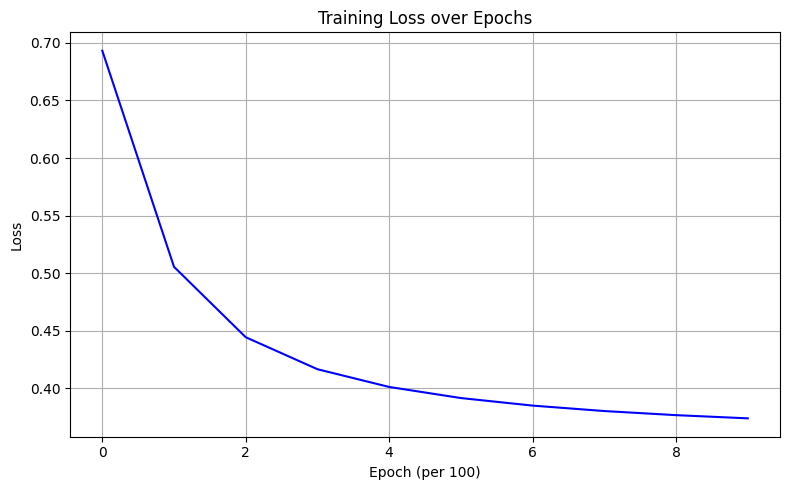

In [64]:
plt.figure(figsize=(8, 5))
plt.plot(losses, color='blue')
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch (per 100)')
plt.ylabel('Loss')
plt.grid(True)
plt.tight_layout()
plt.show()